# Image Segmentation with CellPose
CellPose is a deep-learning based segmentation algorithm for cells and nuclei in microscopy images.

## Installation

```
mamba install cellpose -c pytorch -c conda-forge
```

See also
* [Cellpose in Nature Methods](https://www.nature.com/articles/s41592-020-01018-x)
* [Cellpose on github](https://github.com/MouseLand/cellpose)
* [Cellpose example notebook](https://github.com/MouseLand/cellpose/blob/master/notebooks/run_cellpose.ipynb)

As usual, we start with loading an example image.

In [1]:
import stackview
import cellpose.models
import numpy as np
from skimage.data import human_mitosis
from skimage.io import imread

StackViewNDArray([[ 8,  8,  8, ..., 63, 78, 75],
                  [ 8,  8,  7, ..., 67, 71, 71],
                  [ 9,  8,  8, ..., 53, 64, 66],
                  ...,
                  [ 8,  9,  8, ..., 17, 24, 59],
                  [ 8,  8,  8, ..., 17, 22, 55],
                  [ 8,  8,  8, ..., 16, 18, 38]], dtype=uint8)
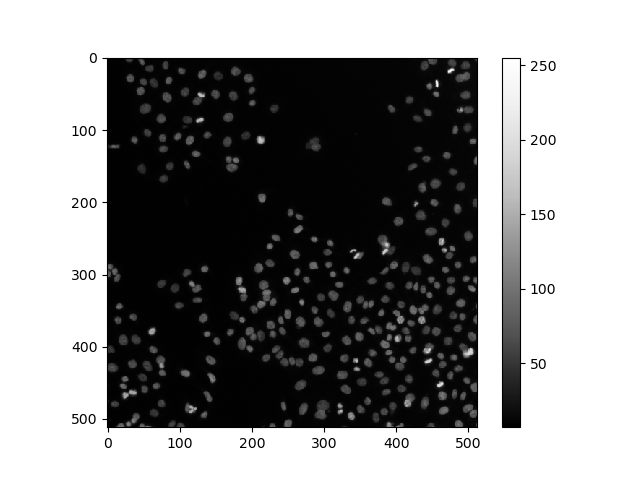
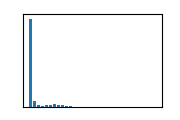

In [2]:
image = human_mitosis()
stackview.insight(image)

## Loading a pretrained model
CellPose comes with a number of pretrained models, e.g. for segmenting images showing cells or nuclei. We will just load a model for segmenting nuclei.

In [3]:
model = cellpose.models.Cellpose(gpu=False, model_type='nuclei')

We let the model "evaluate" the image to produce masks of segmented nuclei.

In [4]:
channels = [0,0] # This means we are processing single-channel greyscale images.

masks, flows, styles, diams = model.eval(image, diameter=None, channels=channels)

StackViewNDArray([[0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  [0, 0, 0, ..., 4, 4, 4],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
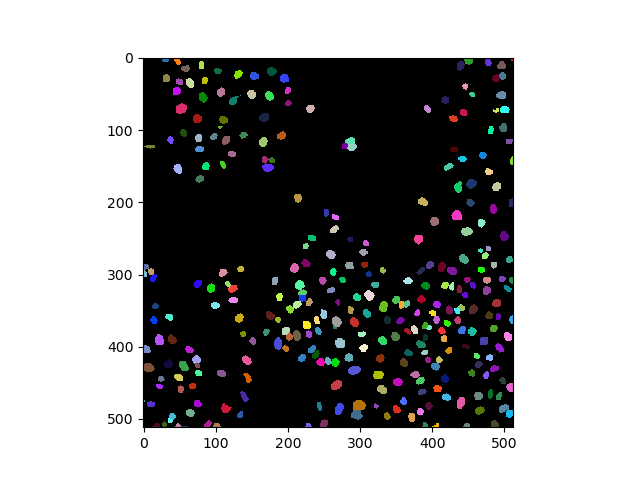

In [5]:
stackview.insight(masks.astype(np.uint32))

## Result visualization
Cell / nuclei segmentation results can be checked best if the resulting label image is overlaid to the original image or by drawing outlines around segmented regions.

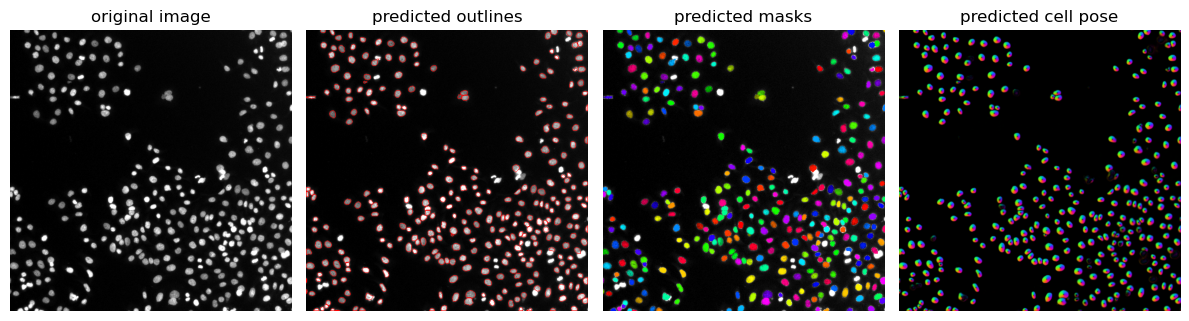

In [6]:
from cellpose import plot
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, image, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

When zooming into the flow images, one can inspect those too.

StackViewNDArray([[[  0,   0,   0],
                   [  0,   0,   0],
                   [  0,   0,   0],
                   ...,
                   [  1, 109, 132],
                   [  2,  59,  89],
                   [  2,  18,  33]],

                  [[  0,   0,   0],
                   [  1,   1,   0],
                   [  0,   0,   0],
                   ...,
                   [  1, 167, 198],
                   [  9, 114, 191],
                   [  9,  38,  87]],

                  [[  0,   0,   0],
                   [  1,   0,   0],
                   [  0,   0,   0],
                   ...,
                   [  0, 181, 192],
                   [ 10, 133, 220],
                   [ 24,  79, 191]],

                  ...,

                  [[  0,   0,   0],
                   [  0,   0,   0],
                   [  0,   0,   0],
                   ...,
                   [123,   1, 156],
                   [141,   7, 215],
                   [141,  10, 227]],

                  [[  0,   0,   0],
                   [  0,   0,   0],
                   [  0,   0,   0],
                   ...,
                   [212,  11, 126],
                   [192,   0, 180],
                   [180,   0, 201]],

                  [[  0,   0,   0],
                   [  0,   0,   0],
                   [  0,   0,   0],
                   ...,
                   [240,  25, 108],
                   [224,   7, 150],
                   [206,   1, 175]]], dtype=uint8)
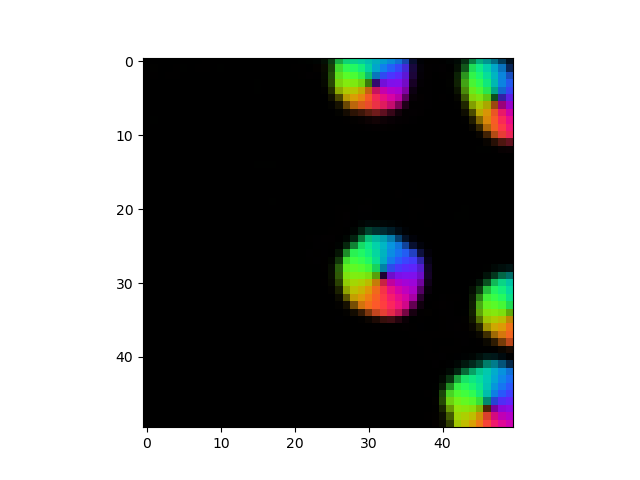
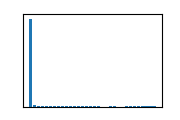

In [7]:
stackview.insight(flows[0][:50,:50])

## List all available built-in models
Cellpose comes with a couple of pretrained models. You can list them like this:

In [8]:
cellpose.models.MODEL_NAMES

['cyto3',
 'nuclei',
 'cyto2_cp3',
 'tissuenet_cp3',
 'livecell_cp3',
 'yeast_PhC_cp3',
 'yeast_BF_cp3',
 'bact_phase_cp3',
 'bact_fluor_cp3',
 'deepbacs_cp3',
 'cyto2',
 'cyto',
 'transformer_cp3',
 'neurips_cellpose_default',
 'neurips_cellpose_transformer',
 'neurips_grayscale_cyto2']

## Exercise
Load the `data/membrane2d.tif` image and segment the cells using cellpose. Hint: The model `nuclei` might not be suited to do this.